## Lecture Notes: Pandas Basics

____

Goals:

Introduce Pandas and key Pandas concepts. By the end, you should understand:

* Create ad manipulate Pandas Series and DataFrames
* Use essential functions to filter, sort and summarize data
* Differentiate between .iloc and .loc for indexing and selecting data
* Handle real-world datasets using CSV files

____

**Create a new environment**

Begin by creating a new environment, let's call it *databehandling*.

In your command, type the following:

        conda create --name databehandling python=3.13

After it's created, **active** it and run the following to install some necesarry libraries for this course

        pip install numpy pandas openpyxl ipykernel seaborn plotly_express nbformat

In [1]:
import random

import numpy as np
import pandas as pd

---

## Pandas Series

A pandas Series is a one-dimensional-array-like object that can hold any data type (integers, floats, strings, etc etc)

**Creating a Series**

You can create a Series from e.g., a list, an array or a dictionary.

In [2]:
# create a Series using a list

number_list = [x for x in range(30, 40)]

print(number_list)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [3]:
my_first_series = pd.Series(number_list)  # creates a Series-object from the provided list

my_first_series

0    30
1    31
2    32
3    33
4    34
5    35
6    36
7    37
8    38
9    39
dtype: int64

In [4]:
isinstance(my_first_series, pd.Series)

True

Here are some basic class methods for Series:

In [5]:
print(f'Seriens minsta värde      : {my_first_series.min()}')
print(f'Seriens största värde     : {my_first_series.max()}')
print(f'Seriens medelvärde        : {my_first_series.mean()}')
print(f'Seriens standardavvikelse : {my_first_series.std()}')

Seriens minsta värde      : 30
Seriens största värde     : 39
Seriens medelvärde        : 34.5
Seriens standardavvikelse : 3.0276503540974917


**Interaction with other Series object**

How does a Series object interact with other objects of the same class under e.g., addition or multiplication?

In [6]:
list_one = [1,2,3]
list_two = [5,6,7]

list_one + list_two 

[1, 2, 3, 5, 6, 7]

In [7]:
series_one = pd.Series(list_one)
series_two = pd.Series(list_two)

# elementwise addition
series_one + series_two

# NOTE: returns a new Series-type object!

0     6
1     8
2    10
dtype: int64

In [8]:
# elemtwise multiplication
series_one*series_two

0     5
1    12
2    21
dtype: int64

In [9]:
# elemtwise division
series_one/series_two

0    0.200000
1    0.333333
2    0.428571
dtype: float64

In [10]:
# elemtwise exponentiation
series_one**series_two

0       1
1      64
2    2187
dtype: int64

We can extract individual elements from a Series by simple indexing

In [11]:
my_first_series[1]

np.int64(31)

We can also extract multiple elements simultaneously

In [12]:
my_first_series[:4]

0    30
1    31
2    32
3    33
dtype: int64

Read more about these operations and methods in the documentation!

---

## Pandas DataFrame

a dataframe is a 2D labeled data structure in Pandas, similar to a table or a spreadsheet.

Each column might hold different types of data (integers, floats, strings, etc.)

Let's create our frist DataFrame

In [13]:
names = ['Amir', 'Sawash', 'Rozann', 'Ali']
ages = [2.5, 5, 31, 35]
eye_colors = ['blue', 'brown', 'green', 'brown']

# we can with ease create DataFrames using dictionaries

family_dict = {'name': names, 
               'age': ages, 
               'eye color': eye_colors}

family_dict


{'name': ['Amir', 'Sawash', 'Rozann', 'Ali'],
 'age': [2.5, 5, 31, 35],
 'eye color': ['blue', 'brown', 'green', 'brown']}

In [14]:
# _df is standard naming convention to signify the object in question is a DataFrame

family_df =  pd.DataFrame(family_dict)

family_df

,name,age,eye color
0,Amir,2.5,blue
1,Sawash,5.0,brown
2,Rozann,31.0,green
3,Ali,35.0,brown


In [15]:
isinstance(family_df, pd.DataFrame)

True

In [16]:
# an important method is .info(), it gives us general meta-data about the contents of the dataframe
# note that Dtype "object" signifies either "string" or mixed type column (e.g., strings and integers)

family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4 non-null      object 
 1   age        4 non-null      float64
 2   eye color  4 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


We can select specific columns from our DataFrame using the column names


In [17]:
# note that the returned column is given as a Series object!

family_df['name']

0      Amir
1    Sawash
2    Rozann
3       Ali
Name: name, dtype: object

We can also extract individual columns by callon on their names as attributes

In [18]:
family_df.name

0      Amir
1    Sawash
2    Rozann
3       Ali
Name: name, dtype: object

In [19]:
# note that calling on columns using the attribute technique is prone to errors, 
# specifically if we e.g., have blanc spaces in the column names


family_df.eye color

SyntaxError: invalid syntax (2509278268.py, line 5)

In [ ]:
family_df['eye color']

We can index several columns at once by passing a list of column names to the DataFrame

In [ ]:
family_df[['name', 'age']]

---

## Further indexing

In Pandas, selecting specific rows and columns is essential for analyzing data. Pandas offers two primary methods to do this:

.iloc[] # index location

.loc[]  # location

In [ ]:
family_df

In [ ]:
family_df[0]    # this does NOT work for a DataFrame

In [ ]:
# let's create some new data
data = {
        'Name' : ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian'],
        'Age' : [25, 30, 35, 40, 22, 29, 28, 22, 31], 
        'Salary': [50000, 60000, 70000, 80000, 52000, 62000, 75000, 55000, 100000]
        }

df = pd.DataFrame(data)

df

Before proceeding, remember that we can get access to Series methods very simply by e.g., first querying on a given column

In [ ]:
print(df['Salary'].mean().round(3))

**.iloc[] position-based indexing**

Use .iloc[] to select data based on the position of rows and columns

The general syntax is

.iloc[row_indexer, column_indexer]

In [ ]:
# if we provide only one index, it'll be understood by Pandas to be the row index

df.iloc[0]   # select the first row

In [ ]:
# we can use slicing to select multiple rows

df.iloc[1:5]   # rows 1 to 4 (5 not included)

In [ ]:
my_slice_df = df.iloc[1:5]

my_slice_df

Let's now also give the column index

In [ ]:
df

In [ ]:
print(df.iloc[3, 2])  # select the value in the row with index 3, and column with index 2 (Salary)

print(df.iloc[6, 1])  # select the value in the row with index 6, and column with index 1 (Age)

In [ ]:
df

In [ ]:
df.iloc[1:4, 0:2]   # rows 1 to 3 (4 not included), columns 0 and 1 (2 not included)

In [ ]:
df.iloc[2:4, 1:]   # 2:4 means rows 2 and 3 (4 not included), 1: means all columns from column 1 

In [ ]:
df.iloc[1:4, :]   # : means all columns

We can also give a list of either rows/columns that we want to index

In [ ]:
df

In [ ]:
df.iloc[[1, 2, 7], [1, 2]]

**loc**

Use .loc[] to select data based on labels (row index and column names)

In [ ]:
data = {
        'Name' : ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian'],
        'Age' : [25, 30, 35, 40, 22, 29, 28, 22, 31], 
        'Salary': [50000, 60000, 70000, 80000, 52000, 62000, 75000, 55000, 100000]
        }

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])


df

Note that even though we have a custom index, .iloc[] still works

In [ ]:
df.iloc[1:4, 0:2]

The syntax for .loc is the same as for .iloc, but instead of using integer indeces, we use labels.

The general syntax is 

.loc[row_label, column_label]

In [ ]:
df.loc['e']   # select the row with label 'e'

In [ ]:
print(df.loc['d', 'Salary'])  # select the element at row 'b' and column 'Age'

In [ ]:
df.loc[['a', 'c', 'e'], ['Name', 'Salary']]   # select rows 'a', 'c', 'e' and columns 'Name', 'Salary'

In [ ]:
df.loc['a':'d']  # slicing works for labels too, under very strict conditions - but it always works for .iloc

---

## Masking

Masking is a powerful feature in Pandas that allows you to filter data based on certain conditions.

Masking is often used to filter data, perform calculations or create subsets of data for further analysis.

In [ ]:
family_df

In [ ]:
# the above df has 4 rows, so let's create a list of booleans of the same size

my_mask = [True, False, True, False]

family_df[my_mask]         # the rows in which the mask is True are returned

In [ ]:
# we have extreme flexibility here, and can use any condition we want to create our mask

eye_color_mask = [color == 'brown' for color in family_df['eye color']]

print(eye_color_mask)

family_df[eye_color_mask]  # the rows where eye color is brown are returned

In [ ]:
family_df['eye color'] == 'brown'    # elemetwise comparison, returns a Series of booleans

In [ ]:
my_color_mask = family_df['eye color'] == 'brown'

family_df[my_color_mask]

In [ ]:
family_df[ family_df['eye color']=='brown' ]

In [ ]:
age_mask = family_df['age'] < 25

kids_df = family_df[age_mask]

kids_df

We can *negate* a mask by using the ~ symbol. Negating means that we get the opposite

In [ ]:
~age_mask    # we get the opposite of age_mask, i.e., all rows it was False is now True, and vice versa.
             # only works if your mask is a Series

In [ ]:
adults_df = family_df[~age_mask]

adults_df

In [ ]:
adults_df = adults_df.reset_index(drop=True)

adults_df

We can combine filters (masks) too!

Only rows that satisfy all masks will then be returned

In [ ]:
print(age_mask)
print(eye_color_mask)

In [ ]:
family_df[age_mask & eye_color_mask]   # only the last row satisfy both masks

Just a little bit more fun

In [ ]:
df

In [ ]:
short_names_mask = [len(name) < 4 for name in df['Name']]

short_names_mask

In [ ]:
df[short_names_mask]

---

## Read excel

In [ ]:
calories_df = pd.read_excel('../../data/calories.xlsx')

calories_df.head()    # shows the first 5 rows of the DataFrame


In [ ]:
calories_df.head(10)  # default is 5, but we can change it

In [ ]:
calories_df.tail()    # shows by default the last 5 rows, but can be changed as well

In [ ]:
calories_df.info()

In [ ]:
# see how many unique values a given column has

calories_df['FoodCategory'].nunique()  # nunique stands for number of unique

In [ ]:
# return the unique values of a given column

calories_df['FoodCategory'].unique()

In [ ]:
calories_df['FoodCategory'].value_counts()

In [ ]:
calories_df[ calories_df['FoodCategory'] == 'FastFood' ]

---

## Rename columns

In [ ]:
calories_df

In [ ]:
calories_df.rename(columns={'FoodItem':'Food'}, inplace=True)

In [ ]:
calories_df.head()

---

## A bit of data cleaning

We will very often need to handle and manipulate data in dataframes, e.g.,

change column names, change element values, create new columns, handle missing data, alter values etc etc.

In [ ]:
calories_df.head()

In [ ]:
# we can index elements in a string Series by using .str[]

calories_df['Cals_per100grams'].str[:4]

In [ ]:
# we can convert datatype to e.g., int (if all elements allow it)

calories_df['Cals_per100grams'].str[:-3].astype(int)

In [ ]:
calories_df['Cals_per100grams (in integers)'] = calories_df['Cals_per100grams'].str[:-3].astype(int)

In [ ]:
calories_df.head()

In [ ]:
calories_df['Cals_per100grams (in integers method 2)'] = [int(x.split()[0]) for x in calories_df['Cals_per100grams']]

In [ ]:
calories_df.head()

---

## Sort DataFrame



In [ ]:
calories_df.sort_values(by='Cals_per100grams (in integers)')  # by default, ascending = True

In [ ]:
calories_df.sort_values(by='Cals_per100grams (in integers)', ascending=False)

In [ ]:
calories_df.iloc[1621]

---

#### Read excel with several scheets and choose header column

In [31]:
population_df = pd.read_excel('../../data/komtopp50_2020.xlsx', header=6)

population_df.rename(columns={'Unnamed: 2': 'Kommun', 
                              '2020.1': 'Folkmängd 31 dec 2020', 
                              'Unnamed: 5': 'Diff'}, inplace=True)  # fortsätt ändra

population_df.sort_values(by='Diff', ascending=False)

,2020,2019,Kommun,Folkmängd 31 dec 2020,2019.1,Diff
2,3,3,Malmö,347949,344166,3783
1,2,2,Göteborg,583056,579281,3775
3,4,4,Uppsala,233839,230767,3072
23,24,24,Haninge,93690,92095,1595
4,5,5,Linköping,164616,163051,1565
7,8,8,Helsingborg,149280,147734,1546
6,7,7,Västerås,155551,154049,1502
0,1,1,Stockholm,975551,974073,1478
9,10,10,Jönköping,142427,141081,1346
10,11,11,Umeå,130224,128901,1323


In [ ]:
population_df['Diff'].sum()

In [32]:
pd.read_excel('../../data/komtopp50_2020.xlsx', header=6, sheet_name='Totalt')

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


---

## Assigning and re-assigning columns in a DataFrame

In [20]:
family_df

,name,age,eye color
0,Amir,2.5,blue
1,Sawash,5.0,brown
2,Rozann,31.0,green
3,Ali,35.0,brown


In [21]:
family_df['gender'] = ['male', 'male', 'female', 'male']

family_df

,name,age,eye color,gender
0,Amir,2.5,blue,male
1,Sawash,5.0,brown,male
2,Rozann,31.0,green,female
3,Ali,35.0,brown,male


In [22]:
family_df['cool'] = 'Helz yeah'

family_df

,name,age,eye color,gender,cool
0,Amir,2.5,blue,male,Helz yeah
1,Sawash,5.0,brown,male,Helz yeah
2,Rozann,31.0,green,female,Helz yeah
3,Ali,35.0,brown,male,Helz yeah


In [23]:
family_df['age'] = family_df['age'] + 1

family_df

,name,age,eye color,gender,cool
0,Amir,3.5,blue,male,Helz yeah
1,Sawash,6.0,brown,male,Helz yeah
2,Rozann,32.0,green,female,Helz yeah
3,Ali,36.0,brown,male,Helz yeah


In [24]:
family_df['age'] = family_df['age']/2

family_df

,name,age,eye color,gender,cool
0,Amir,1.75,blue,male,Helz yeah
1,Sawash,3.00,brown,male,Helz yeah
2,Rozann,16.00,green,female,Helz yeah
3,Ali,18.00,brown,male,Helz yeah


---

### Concatenate two DataFrames

In [25]:
more_data = {'name': ['john', 'jane', 'jim'],
             'age': [23, 24, 25], 
             'eye color': ['r', 'g', 'b'], 
             'gender' : ['male', 'female', 'male']}

strangers_df = pd.DataFrame(more_data)

strangers_df

,name,age,eye color,gender
0,john,23,r,male
1,jane,24,g,female
2,jim,25,b,male


In [27]:
pd.concat([family_df, strangers_df])

,name,age,eye color,gender,cool
0,Amir,1.75,blue,male,Helz yeah
1,Sawash,3.00,brown,male,Helz yeah
2,Rozann,16.00,green,female,Helz yeah
3,Ali,18.00,brown,male,Helz yeah
0,john,23.00,r,male,NaN
1,jane,24.00,g,female,NaN
2,jim,25.00,b,male,NaN


---

### Plot data with Matplotlib

In [33]:
family_df

,name,age,eye color,gender,cool
0,Amir,1.75,blue,male,Helz yeah
1,Sawash,3.00,brown,male,Helz yeah
2,Rozann,16.00,green,female,Helz yeah
3,Ali,18.00,brown,male,Helz yeah


<Axes: >

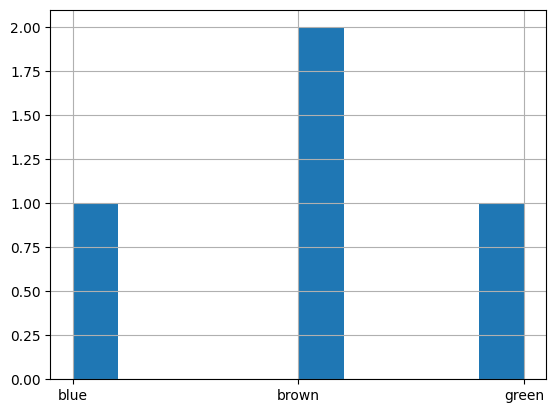

In [38]:
family_df['eye color'].hist()

In [45]:
family_df['eye color'].value_counts()

eye color
brown    2
blue     1
green    1
Name: count, dtype: int64

In [47]:
counts = family_df['eye color'].value_counts().values
labels = family_df['eye color'].value_counts().index.values

print(counts)
print(labels)


[2 1 1]
['brown' 'blue' 'green']


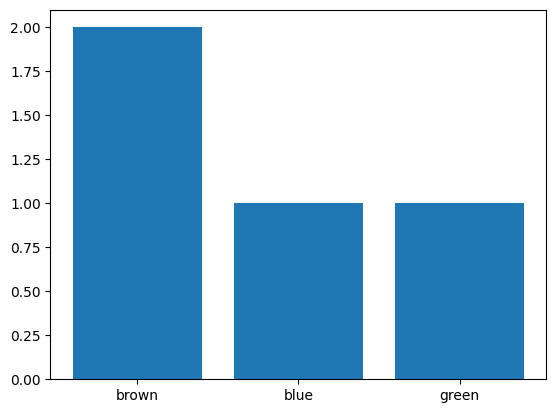

In [48]:
import matplotlib.pyplot as plt

plt.bar(labels, counts)
plt.show()

---

## Two Important Notes

* It's *VERY* important that you put alot of time into beig mindful with not only what you visualise, but also HOW you visualise it.
* Furthermore, I'm going to require you to read the documentation of the libraries that we use. Including Pandas, matplotlib, Seaborn etc.

We will not have nearly enough time to cover every aspects of the libraries, so it's your responsibility to seek out the information that you need.

_____